# Building Functions

In [1]:
def total(list_obj):
    total = 0
    for val in list_obj:
        total += val
    return total

def mean(list_obj):
    n = len(list_obj)
    mean_ = total(list_obj) / n
    return mean_

def median(list_obj):
    n = len(list_obj)
    # sort the values and take the middle value if the 
    #    list is of odd length
    # or the mean of the two middle values if the list 
    #    of even length 
    list_obj = sorted(list_obj)
    if n % 2 != 0:
        # list length is odd
        middle_index = int((n - 1) / 2)
        median_ = list_obj[middle_index]
    else:
        upper_middle_index = int(n / 2)
        lower_middle_index = upper_middle_index - 1
        # pass slice with two middle values to mean()
        median_ = mean(
            list_object[lower_middle_index:upper_middle_index])
    return median_

def mode(list_obj):
    max_count = 0
    counter_dict = {}
    for value in list_obj:
        counter_dict[value] = 0
    for value in list_obj:
        counter_dict[value] += 1
    count_list = list(counter_dict.values())
    max_count = max(count_list)
    mode_ = [key for key in counter_dict if counter_dict[key] == max_count]
    
    return mode_

def variance(list_obj, sample = False):
    # popvar(list) = sum((xi - list_mean)**2) / n for all xi in list
    # save mean value of list
    list_mean = mean(list_obj)
    # use n to calculate average of sum squared diffs
    n = len(list_obj)
    # create value we can add squared diffs to
    sum_sq_diff = 0
    for val in list_obj:
        # adds each squared diff to sum_sq_diff
        sum_sq_diff += (val - list_mean) ** 2
    if sample == False:
        # normalize result by dividing by n
        variance_ = sum_sq_diff / n
    else:
        # for samples, normalize by dividing by (n-1)
        variance_ = sum_sq_diff / (n - 1)
    
    return variance_

def SD(list_obj, sample = False):
    # Standard deviation is the square root of variance
    SD_ = variance(list_obj, sample) ** (1/2)
    
    return SD_

def covariance(list_obj1, list_obj2, sample = False):
    # determine the mean of each list
    mean1 = mean(list_obj1)
    mean2 = mean(list_obj2)
    # instantiate a variable holding the value of 0; this will be used to 
    # sum the values generated in the for loop below
    cov = 0
    n1 = len(list_obj1)
    n2 = len(list_obj2)
    # check list lengths are equal
    if n1 == n2:
        n = n1
        # sum the product of the differences
        for i in range(n1):
            cov += (list_obj1[i] - mean1) * (list_obj2[i] - mean2)
        if sample == False:
            cov = cov / n
        # account for sample by dividing by one less than number of elements in list
        else:
            cov = cov / (n - 1)
        # return covariance
        return cov
    else:
        print("List lengths are not equal")
        print("List1:", n1)
        print("List2:", n2)
    

def correlation(list_obj1, list_obj2):
    # corr(x,y) = cov(x, y) / (SD(x) * SD(y))
    cov = covariance(list_obj1, list_obj2)
    SD1 = SD(list_obj1)
    SD2 = SD(list_obj2)
    corr = cov / (SD1 * SD2)
    return corr

def skewness(list_obj, sample = False):
    mean_ = mean(list_obj)
    SD_ = SD(list_obj, sample)
    skew = 0
    n = len(list_obj)
    for val in list_obj:
        skew += (val - mean_) ** 3
    skew = skew / (n * SD_ **3) if not sample else n * skew / ((n - 1)*(n - 2) * SD_ ** 3)
        
    return skew

def kurtosis(list_obj, sample = False):
    mean_ = mean(list_obj)
    kurt = 0
    SD_ = SD(list_obj, sample)
    n = len(list_obj)
    for val in list_obj:
        kurt += (val - mean_) ** 4
    kurt = kurt / (n * SD_ ** 4) if sample == False else  n * (n + 1) * kurt / \
    ( (n - 1) * (n - 2) *(n - 3) * (SD_ ** 4)) - (3 *(n - 1) ** 2) / ((n - 2) * (n - 3))
    
    return kurt

In [2]:
lst = [4,5,6,7,8,9,4]

print("total:", total(lst))
print("mean:", mean(lst))
print("median:", median(lst))
print("mode:", mode(lst))
print("variance:", variance(lst, sample = False))
print("variance (sample):", variance(lst, sample = True))
print("SD:", SD(lst, sample = False))
print("SD: (sample):", SD(lst, sample = True))

lst2 = [5,23,7,5,3,2,1]
print("Covariance:", covariance(lst, lst2, sample = False))
print("Covariance (sample):", covariance(lst, lst2, sample = True))
print("Correlation:", correlation(lst, lst2))
print("Skewness:", skewness(lst, sample = False))
print("Skewness (sample):", skewness(lst, sample = True))
print("Kurtosis:", kurtosis(lst, sample = False))
print("Kurtosis (sample):", kurtosis(lst, sample = True))

total: 43
mean: 6.142857142857143
median: 6
mode: [4]
variance: 3.265306122448979
variance (sample): 3.809523809523809
SD: 1.8070158058105024
SD: (sample): 1.9518001458970662
Covariance: -3.510204081632653
Covariance (sample): -4.095238095238095
Correlation: -0.2788447874269649
Skewness: 0.22234764798058862
Skewness (sample): 0.288195490292613
Kurtosis: 1.6473437499999997
Kurtosis (sample): -1.4463750000000002


## Create a function that generates a datastructure with statistics for each column of data

In [3]:

import pandas as pd
def gather_statistics(df, sample = True):
    # create a dictionary of dictionaries with an 
    #  entry for each column of data in a dataframe, df
    dct = {key:{} for key in df}
    # call each column of data and its name (key)
    # df.items() makes a list of tuples where
    #  tuple index 0 refers to the key, 
    #   index 1 refers to object pointed to by key   
    for key, val in df.items():
        # inplace = True alters the object itself
        val.dropna(axis=0, inplace =True)
        dct[key]["mean"] = round(mean(val), 3)
        dct[key]["median"] = round(median(val), 3)
        dct[key]["variance"] = round(variance(val, sample), 3)
        dct[key]["S.D."] = round(SD(val, sample), 3)
        dct[key]["skewness"] = round(skewness(val, sample), 3)
        dct[key]["kurtosis"] = round(kurtosis(val, sample), 3)
        
    stats_df = pd.DataFrame(dct)
    return stats_df

In [4]:
!pip install pandas-datareader

In [5]:

import pandas_datareader.data as web
import datetime

start = datetime.datetime(2012, 1, 1)
end = datetime.datetime.today()

print(start, end)

2012-01-01 00:00:00 2021-09-29 08:56:00.589282


In [6]:
data_dict = {}
stocks = ["MSFT", "AAPL", "FB", "TSLA"]
for key in stocks:
    data_dict[key] = web.DataReader(key, "yahoo", start, end)
    data_dict[key].style.set_caption(key)

In [7]:
print(key +" Closing Price")
data_dict[key]

TSLA Closing Price


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,5.900000,5.530000,5.788000,5.616000,4640500.0,5.616000
2012-01-04,5.734000,5.500000,5.642000,5.542000,3150500.0,5.542000
2012-01-05,5.586000,5.370000,5.552000,5.424000,5027500.0,5.424000
2012-01-06,5.558000,5.282000,5.440000,5.382000,4931500.0,5.382000
2012-01-09,5.498000,5.224000,5.400000,5.450000,4485000.0,5.450000
...,...,...,...,...,...,...
2021-09-23,758.200012,747.919983,755.000000,753.640015,11947500.0,753.640015
2021-09-24,774.799988,744.559998,745.890015,774.390015,21336900.0,774.390015
2021-09-27,799.000000,769.309998,773.119995,791.359985,28070700.0,791.359985


In [8]:
data_dict.keys()

dict_keys(['MSFT', 'AAPL', 'FB', 'TSLA'])

In [9]:

data_dict.values()

dict_values([                  High         Low        Open       Close      Volume  \
Date                                                                     
2012-01-03   26.959999   26.389999   26.549999   26.770000  64731500.0   
2012-01-04   27.469999   26.780001   26.820000   27.400000  80516100.0   
2012-01-05   27.730000   27.290001   27.379999   27.680000  56081400.0   
2012-01-06   28.190001   27.530001   27.530001   28.110001  99455500.0   
2012-01-09   28.100000   27.719999   28.049999   27.740000  59706800.0   
...                ...         ...         ...         ...         ...   
2021-09-23  300.899994  297.529999  298.850006  299.559998  18604600.0   
2021-09-24  299.799988  296.929993  298.230011  299.350006  14994200.0   
2021-09-27  296.470001  292.940002  296.140015  294.170013  23571700.0   
2021-09-28  290.779999  282.750000  289.799988  283.519989  43139400.0   
2021-09-29  286.149994  283.140015  285.100006  286.040009   3925737.0   

             Adj Close  

In [10]:
for val in data_dict.values():
    print(val["Close"])

Date
2012-01-03     26.770000
2012-01-04     27.400000
2012-01-05     27.680000
2012-01-06     28.110001
2012-01-09     27.740000
                 ...    
2021-09-23    299.559998
2021-09-24    299.350006
2021-09-27    294.170013
2021-09-28    283.519989
2021-09-29    286.040009
Name: Close, Length: 2452, dtype: float64
Date
2012-01-03     14.686786
2012-01-04     14.765714
2012-01-05     14.929643
2012-01-06     15.085714
2012-01-09     15.061786
                 ...    
2021-09-23    146.830002
2021-09-24    146.919998
2021-09-27    145.369995
2021-09-28    141.910004
2021-09-29    143.990005
Name: Close, Length: 2452, dtype: float64
Date
2012-05-18     38.230000
2012-05-21     34.029999
2012-05-22     31.000000
2012-05-23     32.000000
2012-05-24     33.029999
                 ...    
2021-09-23    345.959991
2021-09-24    352.959991
2021-09-27    353.579987
2021-09-28    340.649994
2021-09-29    342.920013
Name: Close, Length: 2357, dtype: float64
Date
2012-01-03      5.616000
2012

In [11]:
close_data = pd.concat((df["Close"] for df in data_dict.values()), 
                       keys = data_dict.keys(),
                        axis = 1)
close_data

,MSFT,AAPL,FB,TSLA
Date,,,,
2012-01-03,26.770000,14.686786,NaN,5.616000
2012-01-04,27.400000,14.765714,NaN,5.542000
2012-01-05,27.680000,14.929643,NaN,5.424000
2012-01-06,28.110001,15.085714,NaN,5.382000
2012-01-09,27.740000,15.061786,NaN,5.450000
...,...,...,...,...
2021-09-23,299.559998,146.830002,345.959991,753.640015
2021-09-24,299.350006,146.919998,352.959991,774.390015
2021-09-27,294.170013,145.369995,353.579987,791.359985


## Pandas has built in matplotlib extension

Text(0.5, 1.0, 'Close\nDaily Stock Prices')

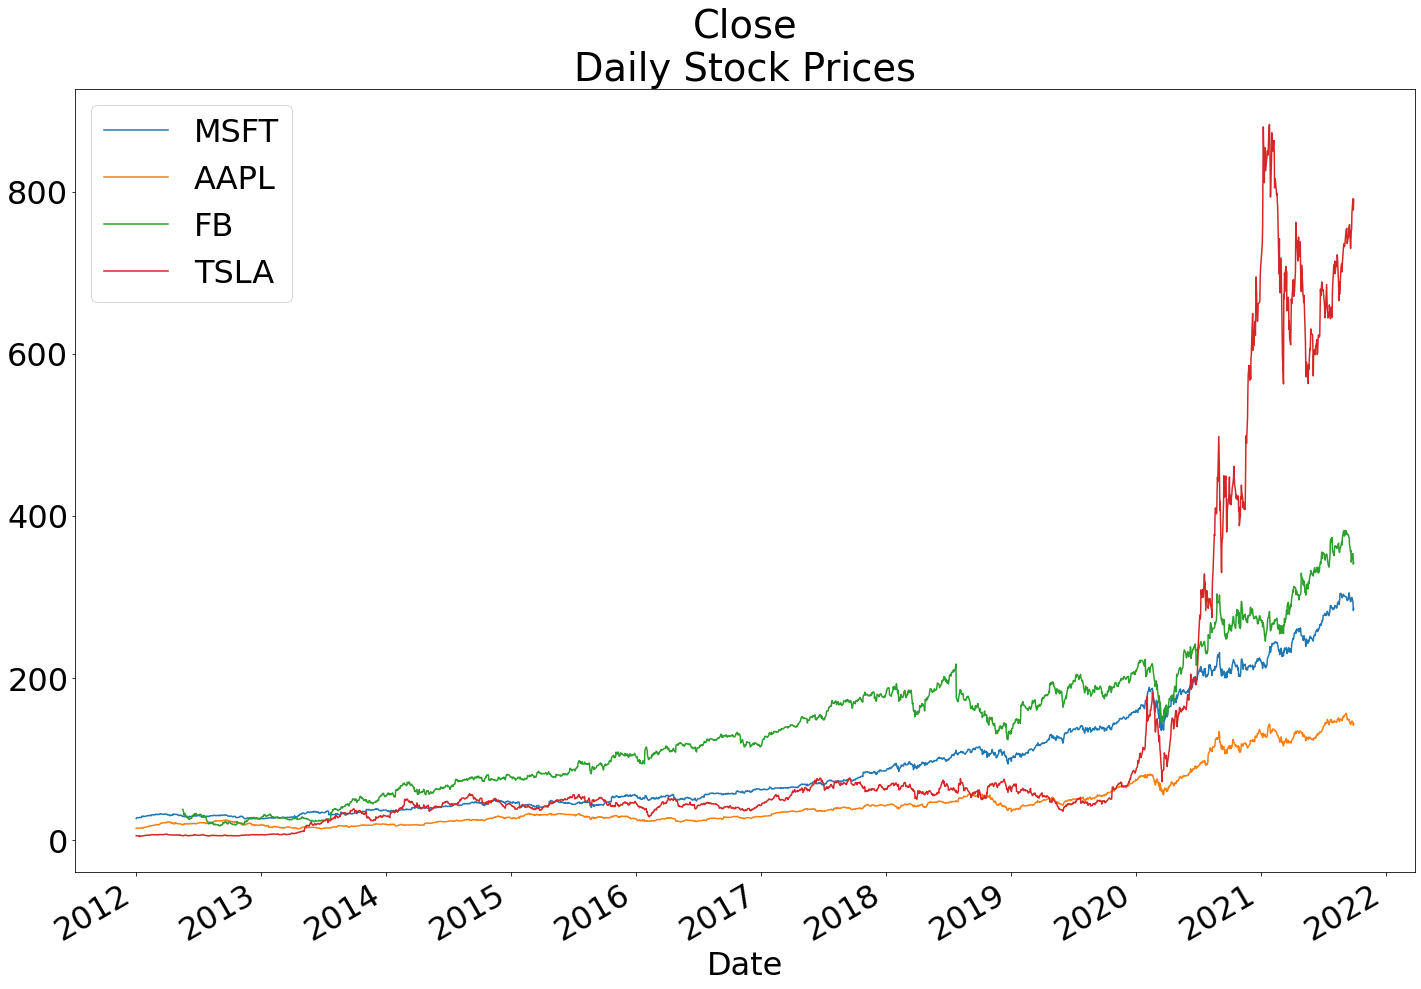

In [12]:

import matplotlib.pyplot as plt

plt.rcParams.update({"font.size":32})
fig, ax = plt.subplots(figsize = (24,16))
close_data.plot.line(ax = ax, legend = True)
plt.title("Close\nDaily Stock Prices")

<ipython-input-13-0eb7047172d3>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(y) if y >= 1 else round(y, 1) for y in y_vals])


[Text(0, 0.1, '0.1'),
 Text(0, 1.0, '1'),
 Text(0, 10.0, '10'),
 Text(0, 100.0, '100'),
 Text(0, 1000.0, '1000'),
 Text(0, 10000.0, '10000')]

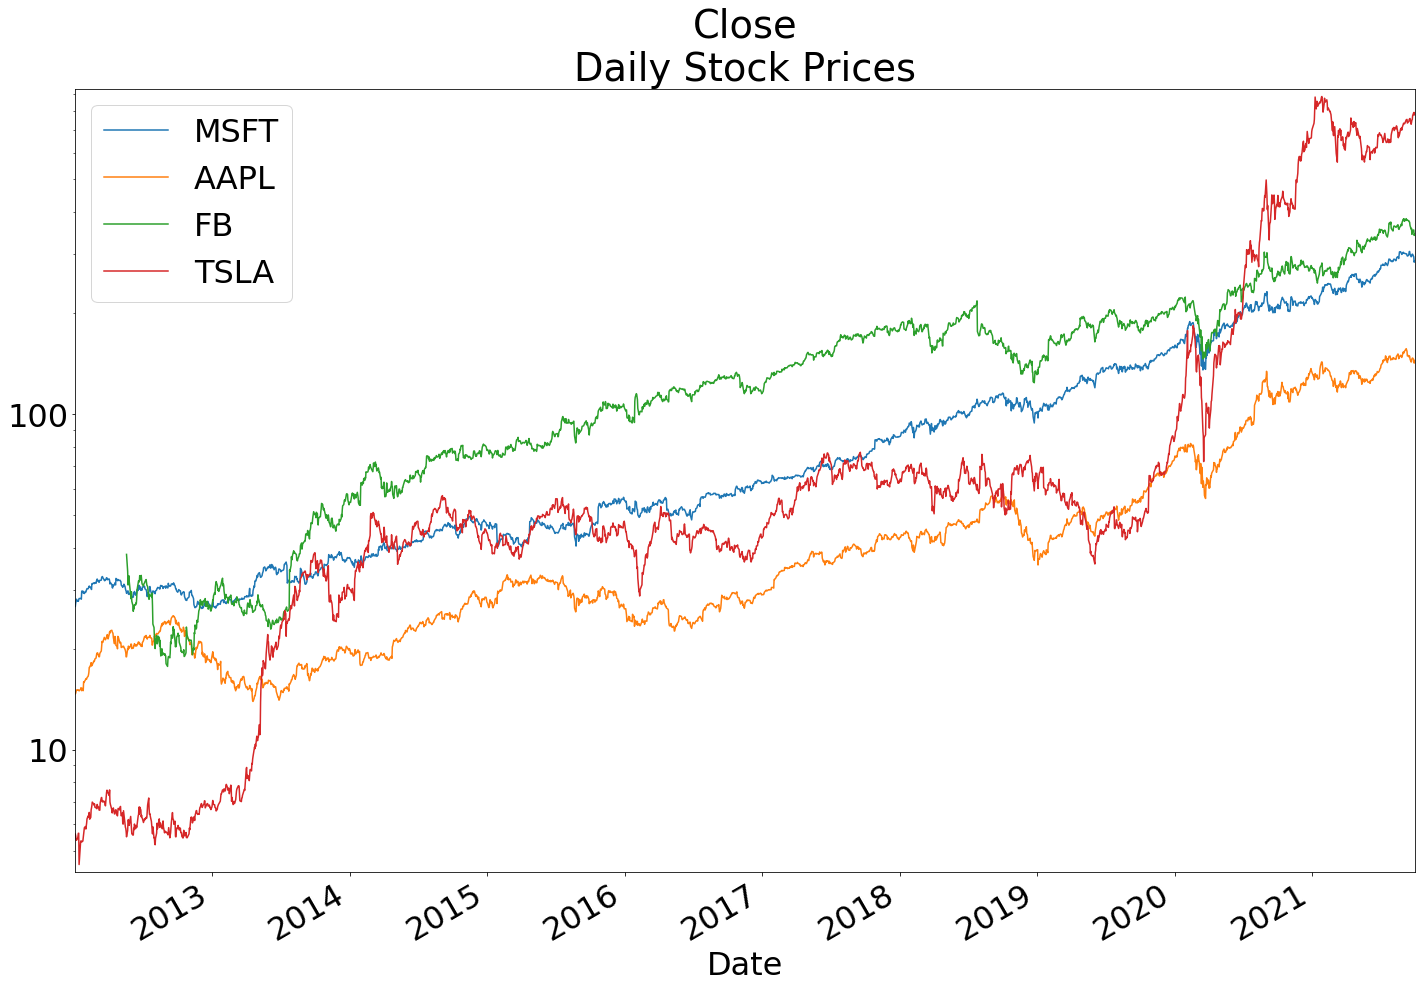

In [13]:
import matplotlib.pyplot as plt

plt.rcParams.update({"font.size":32})
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = .01  
    
fig, ax = plt.subplots(figsize = (24,16))
close_data.plot.line(ax = ax, legend = True)

plt.title("Close\nDaily Stock Prices")
ax.set_yscale("log")
# reset y-ticklabels so that they are not in 
# scientific notation
y_vals = ax.get_yticks()
ax.set_yticklabels([int(y) if y >= 1 else round(y, 1) for y in y_vals])

In [14]:
price_change_data = close_data.pct_change() * 100
price_change_data

,MSFT,AAPL,FB,TSLA
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,2.353377,0.537408,NaN,-1.317670
2012-01-05,1.021900,1.110200,NaN,-2.129196
2012-01-06,1.553469,1.045381,NaN,-0.774333
2012-01-09,-1.316261,-0.158618,NaN,1.263468
...,...,...,...,...
2021-09-23,0.328224,0.671920,0.801259,0.226083
2021-09-24,-0.070100,0.061293,2.023355,2.753304
2021-09-27,-1.730413,-1.054998,0.175656,2.191398
